In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib_inline.backend_inline

In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
np.pi

3.141592653589793

### 1. Defining function and its gradient

In [5]:
def fx(x):
    
    Pi = np.pi
    return np.cos(2*Pi*x) + x**2

def dfx(x):
    
    Pi = np.pi
    return -2*Pi*np.sin(2*Pi*x) + 2*x


In [6]:
fx(np.pi/2)

1.564715738339268

In [7]:
dfx(np.pi/2)

5.845254937906264

### 2. Plot the function f(x) and its gradient.

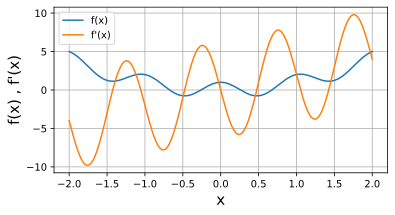

In [8]:
plt.figure(figsize = (6,3))
x = np.linspace(start = -2 ,stop = 2 , num = 2000)

plt.plot(x ,fx(x) ,label = "f(x)")
plt.plot(x , dfx(x) ,label = "f'(x)")

plt.xlabel("x" , fontsize = 15)
plt.ylabel("f(x) , f'(x)" ,fontsize =15)
plt.legend()
plt.grid(True)

plt.show()

### 3. Finding Minima using Iteration

In [9]:
# Random starting point
localmin = np.random.choice(x ,1)
print("Intial guess value of local min point :",localmin)

# learning parameters  
learning_rates = 0.01
training_epochs = 100

# Run through training

for i in range(training_epochs):
    
    grad = dfx(localmin)
    localmin = localmin  - learning_rates*grad

print("final value of local min point : ",localmin)

Intial guess value of local min point : [-0.74337169]
final value of local min point :  [-0.47580245]


In [10]:
localmin[0]

-0.4758024510242212

### 4. Plotting the Minima on the function graph

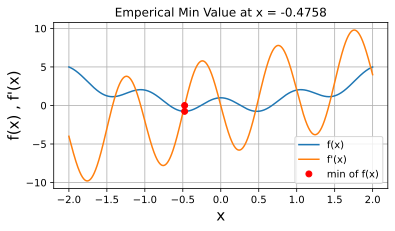

In [11]:
plt.figure(figsize = (6,3))
plt.plot(x ,fx(x) ,label = "f(x)")
plt.plot(x , dfx(x) ,label = "f'(x)")

plt.plot(localmin , fx(localmin) ,'ro' ,label = 'min of f(x)')
plt.plot(localmin ,dfx(localmin) , 'ro')


plt.xlabel("x" , fontsize = 15)
plt.ylabel("f(x) , f'(x)" ,fontsize =15)
plt.legend()
plt.grid(True)
plt.title(f"Emperical Min Value at x = {np.round(localmin[0],4)}")
plt.show()

### 5. Store the model parameters and outputs on each iteration.

In [12]:
# random starting point
localmin =  np.array([0.00001])      #np.random.choice(x ,1)
print("Intial guess value of local min point :",localmin)

# learning parameters  
learning_rates = 0.01
training_epochs = 100

# Run through training and store all the results
modelparams = np.zeros(shape = (training_epochs ,2))

# Run through training
for i in range(training_epochs):
    
    grad = dfx(localmin)
    localmin = localmin  - learning_rates*grad
    
    modelparams[i,0] = localmin 
    modelparams[i,1] =  grad
print("final value of local min point : ",localmin)

Intial guess value of local min point : [1.e-05]
final value of local min point :  [0.47580245]


In [13]:
# modelparams 

### 6. Iteration Plot for Minima and Gradient

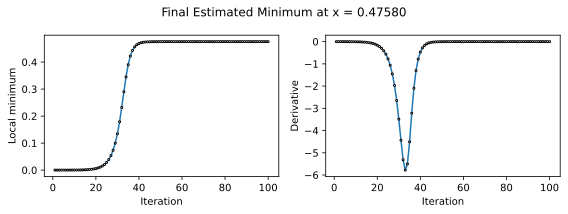

In [14]:
fig ,ax = plt.subplots(1,2 ,figsize = (8,3))

for i in range(2):
        
    ax[i].plot(list(range(1,len(modelparams[:,i])+1)), modelparams[:,i] , 'o-' ,markersize = 2 ,
               markerfacecolor = 'white' ,
               markeredgecolor  = 'black')
    
    ax[i].set_xlabel("Iteration")
    
                    
ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")    
fig.suptitle(f"Final Estimated Minimum at x = {localmin[0]:0.5f}")
fig.tight_layout()

plt.show()